In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
data = pd.read_csv("laptops.csv")

In [119]:
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


#### Data Preprocessing

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 132.4+ KB


In [121]:
data.drop('Operating System Version',axis=1, inplace=True)
data

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,1.8kg,5673096.00
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,1.3kg,13329108.00
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,1.5kg,2036268.00
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,2.19kg,6793488.00


In [122]:
data['Wt'] = data['Weight'].apply(lambda x: x.split('k')[0])
data['R'] = data['RAM'].apply(lambda x: x.split('G')[0])
data['SS'] = data['Screen Size'].apply(lambda x: x.split('\"')[0])

data = data.drop(['Weight', 'Screen Size', 'RAM'], axis=1)
data = data.rename(columns={'SS': 'Screen Size', 'R': 'RAM', 'Wt': 'Weight'})

data['RAM'] = data['RAM'].astype('int64')
data['Screen Size'] = data['Screen Size'].astype('float64')
data['Weight'] = data['Weight'].astype('float64')

data

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows,5673096.00,1.80,4,14.0
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows,13329108.00,1.30,16,13.3
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows,2036268.00,1.50,2,14.0
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,1TB HDD,AMD Radeon R5 M330,Windows,6793488.00,2.19,6,15.6


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5    Storage          1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   float64
 10  RAM               1302 non-null   int64  
 11  Screen Size       1302 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.2+ KB


<Figure size 1500x800 with 0 Axes>

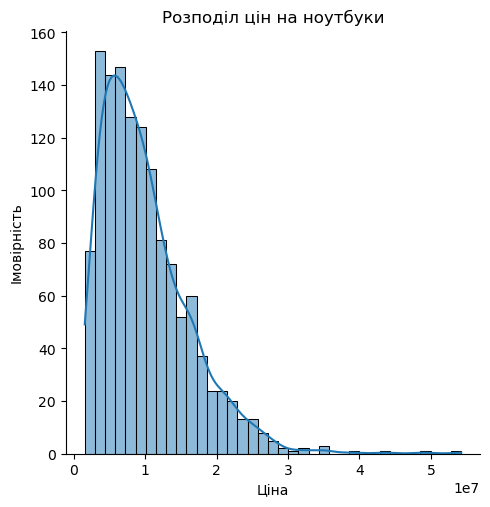

In [124]:
plt.figure(figsize=(15, 8))
sns.displot(data['Price'], kde=True)
plt.xlabel('Ціна')
plt.ylabel('Імовірність')
plt.title('Розподіл цін на ноутбуки')
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

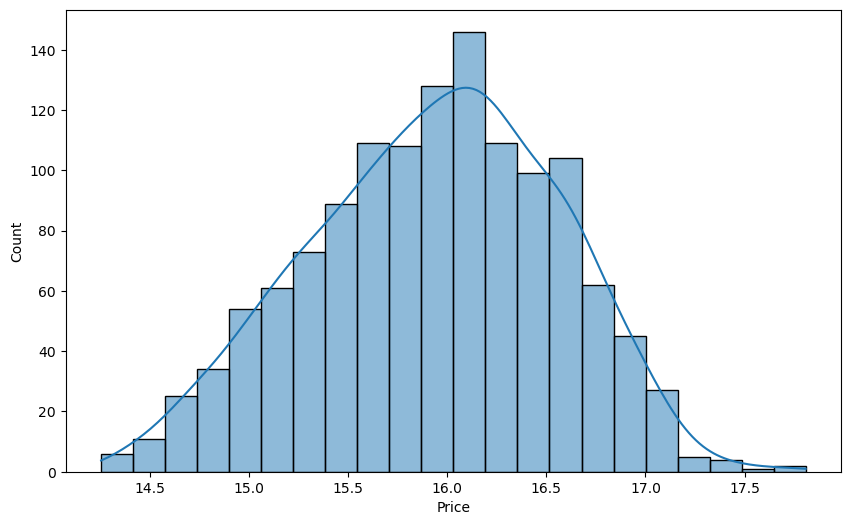

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['Price']), kde=True)

<Axes: >

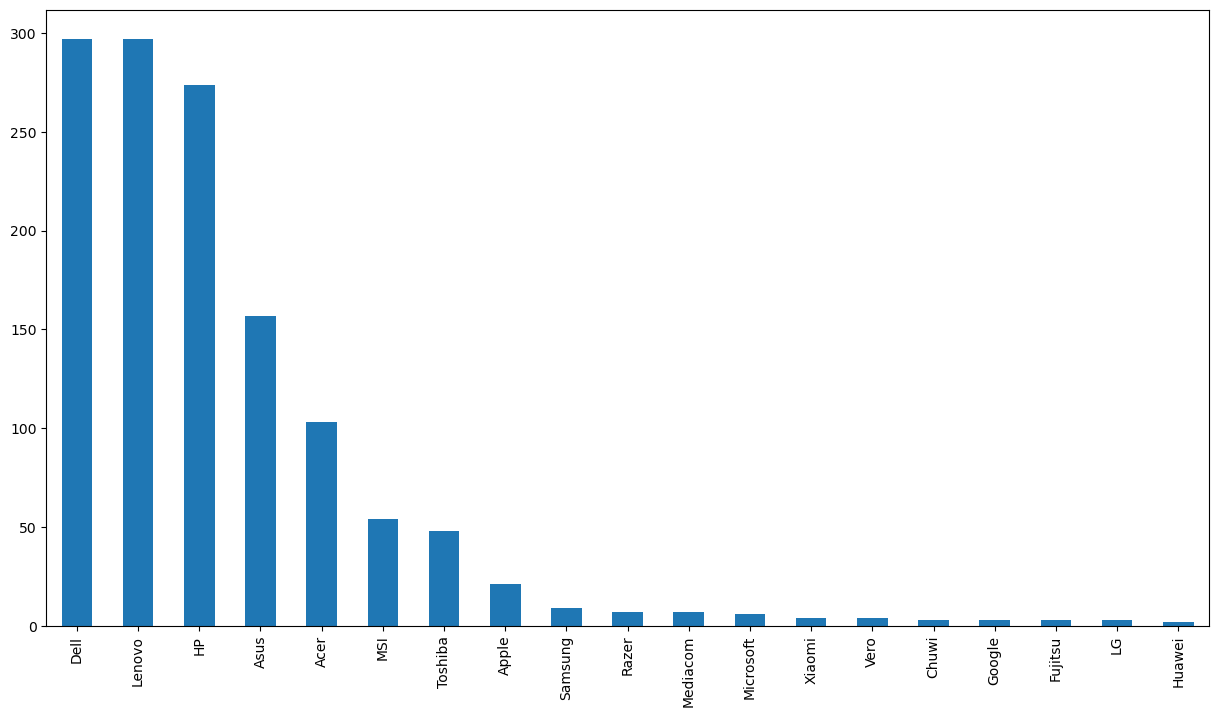

In [126]:
plt.figure(figsize=(15,8))
data['Manufacturer'].value_counts().plot(kind='bar')

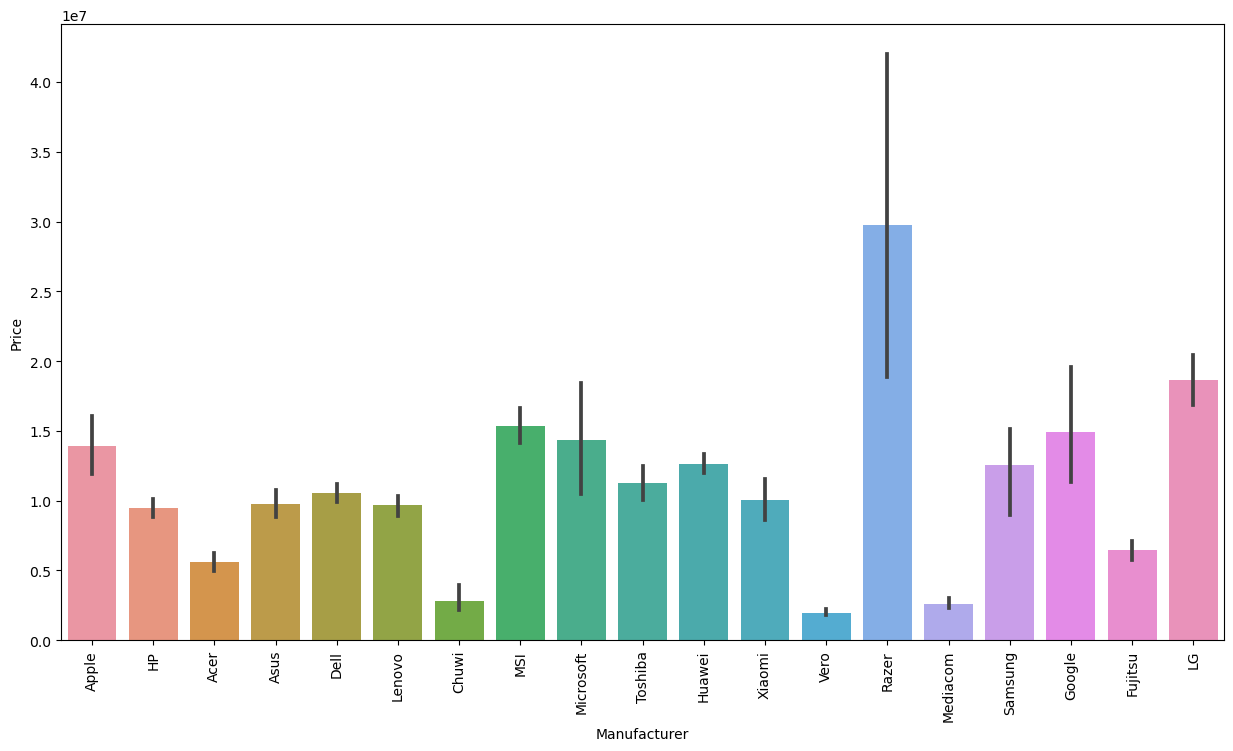

In [127]:
plt.figure(figsize=(15,8))
sns.barplot(x = data['Manufacturer'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [128]:
data['Manufacturer'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Manufacturer, dtype: int64

In [190]:
def fetch_manufacturer(manuf):
    if manuf in ("Huawei", 'Fujitsu', 'Google','LG', 'Microsoft', 'Samsung', 'Xiaomi'):
        return "Other (middle price)"
    elif manuf in ('Vero', 'Chuwi', 'Mediacom'):
        return "Other (low price)"
    else:
        return manuf

In [191]:
data['Manufacturer'] = data['Manufacturer'].apply(fetch_manufacturer)

In [192]:
data['Manufacturer'].value_counts()

Dell                    297
Lenovo                  297
HP                      274
Asus                    157
Acer                    103
MSI                      54
Toshiba                  48
Other (middle price)     29
Apple                    21
Other (low price)        14
Razer                     7
Name: Manufacturer, dtype: int64

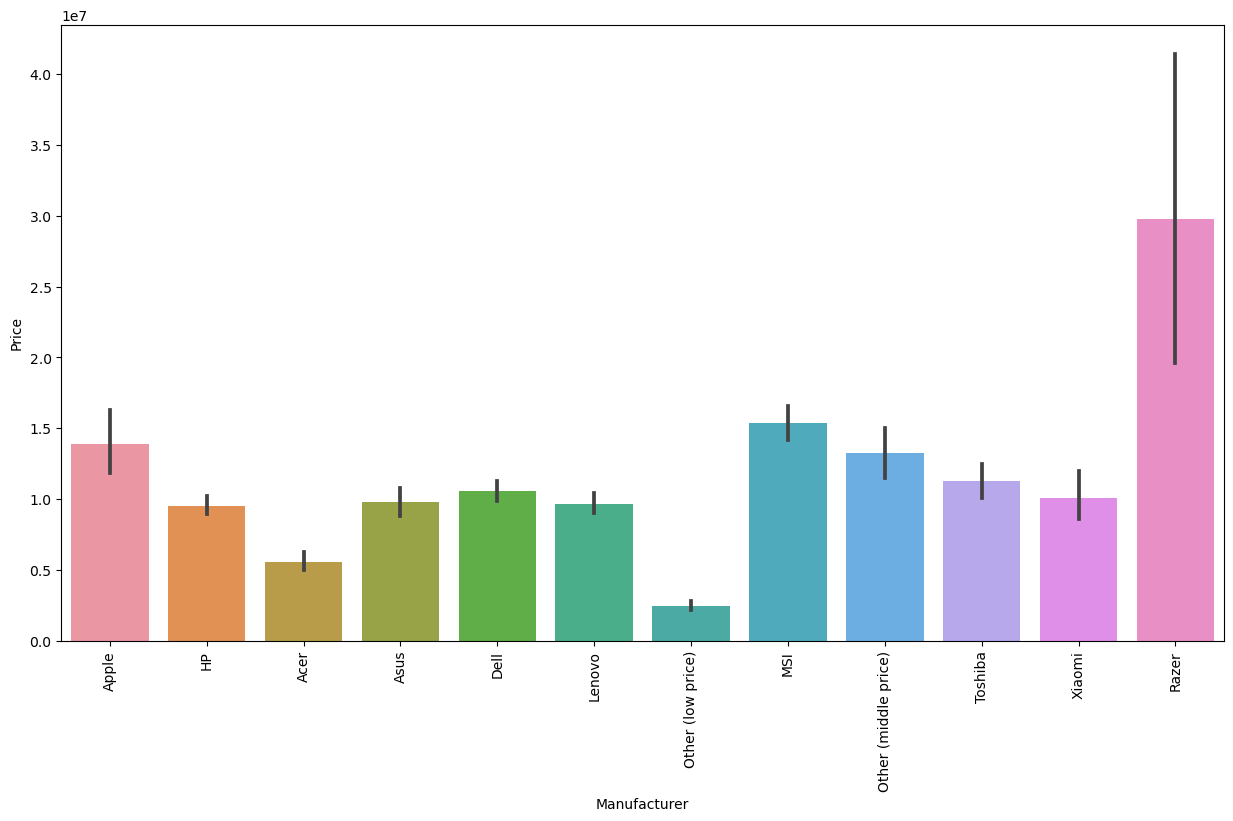

In [132]:
plt.figure(figsize=(15,8))
sns.barplot(x = data['Manufacturer'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

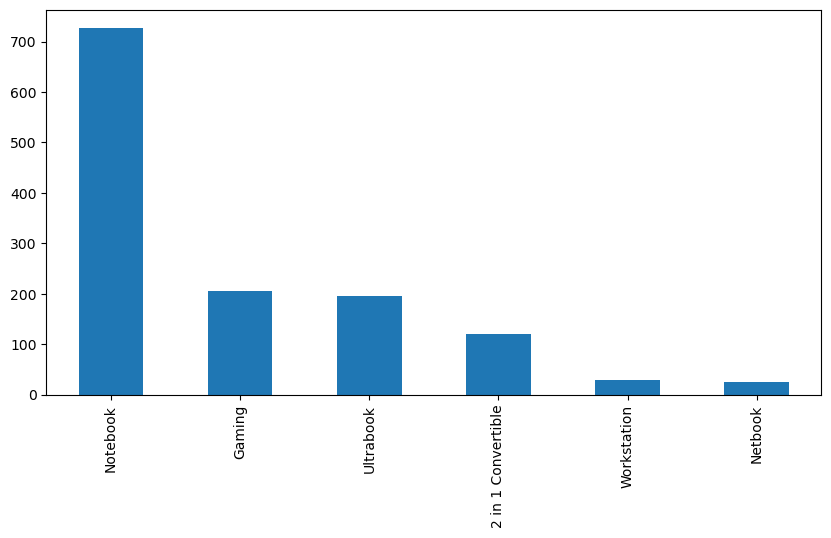

In [133]:
plt.figure(figsize=(10,5))
data['Category'].value_counts().plot(kind='bar')

<Axes: >

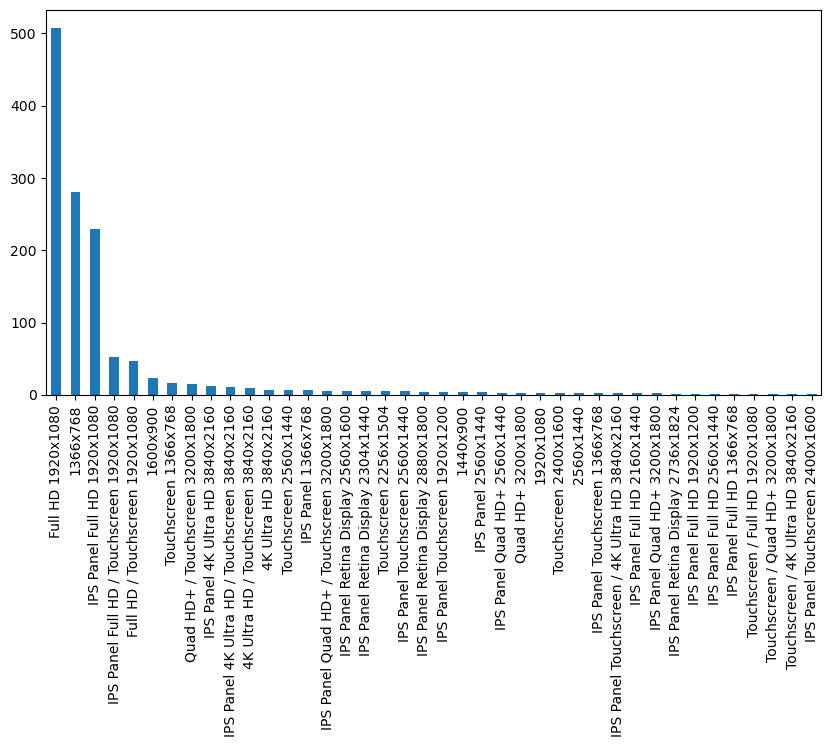

In [134]:
plt.figure(figsize=(10,5))
data['Screen'].value_counts().plot(kind='bar')

Add TouchScreen column

In [135]:
data['TouchScreen'] = data['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
data.sample(5)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen
733,Acer,Extensa EX2540-58KR,Notebook,1366x768,Intel Core i5 7200U 2.5GHz,500GB HDD,Intel HD Graphics 620,Windows,4970628.0,2.40,4,15.6,0
609,Acer,Swift SF114-31-P5HY,Notebook,1366x768,Intel Pentium Quad Core N3710 1.6GHz,128GB Flash Storage,Intel HD Graphics 405,Windows,3103308.0,1.60,4,14.0,0
1055,HP,250 G5,Notebook,1366x768,Intel Core i5 7200U 2.5GHz,500GB HDD,Intel HD Graphics 620,No OS,4437108.0,1.96,4,15.6,0
1095,Dell,Inspiron 5567,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1TB HDD,AMD Radeon R7 M445,Windows,5680209.6,2.36,8,15.6,0
779,Asus,Vivobook Max,Notebook,1920x1080,Intel Pentium Dual Core N4200 1.1GHz,128GB SSD,Intel HD Graphics 505,Windows,5174254.8,2.00,8,15.6,0


In [136]:
data.groupby('TouchScreen').size()

TouchScreen
0    1111
1     191
dtype: int64

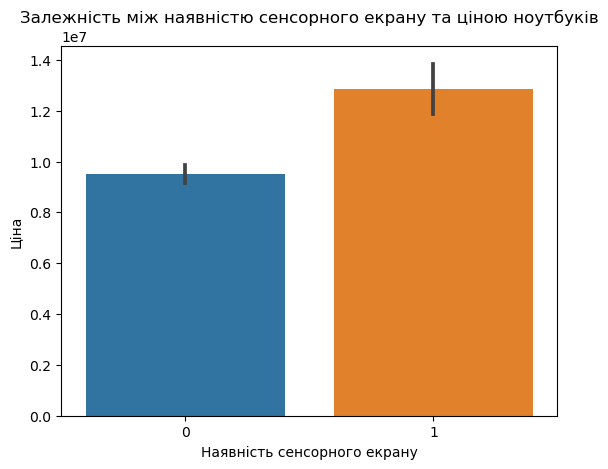

In [137]:
sns.barplot(x=data['TouchScreen'], y=data['Price'])
plt.xlabel('Наявність сенсорного екрану')
plt.ylabel('Ціна')
plt.title('Залежність між наявністю сенсорного екрану та ціною ноутбуків')
plt.show()

Add IPS Screen column

In [138]:
data['IPS'] = data['Screen'].apply(lambda x: 1 if 'IPS' in x else 0)
data.groupby('IPS').size()

IPS
0    937
1    365
dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

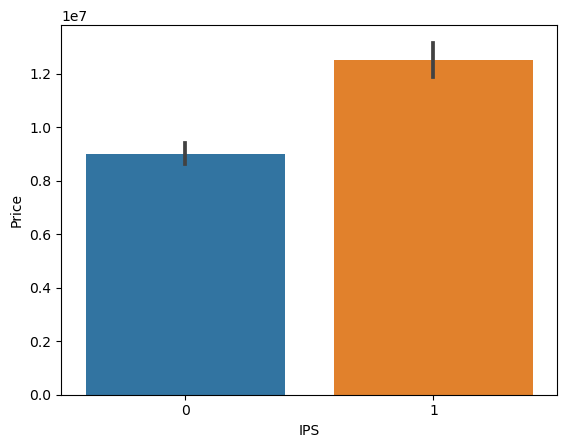

In [139]:
sns.barplot(x = data['IPS'], y = data['Price'])

In [140]:
data

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,IPS
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3,0,1
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3,0,0
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6,0,0
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4,0,1
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows,5673096.00,1.80,4,14.0,1,1
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows,13329108.00,1.30,16,13.3,1,1
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows,2036268.00,1.50,2,14.0,0,0
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,1TB HDD,AMD Radeon R5 M330,Windows,6793488.00,2.19,6,15.6,0,0


Add PPI column

In [141]:
new = data['Screen'].str.split('x',n=1,expand=True)
data['X_reso'] = new[0]
data['Y_reso'] = new[1]

In [142]:
data["X_reso"] = data["X_reso"].apply(lambda x: x.split()[-1])
data['X_reso'] = data['X_reso'].astype('int64')
data['Y_reso'] = data['Y_reso'].astype('int64')


PPI = ((x_reso^2 + y_reso^2)^1/2)/inches

In [143]:
data['ppi'] = (((data['X_reso']**2 + data['Y_reso']**2)**0.5)/data['Screen Size']).astype('float64')

In [144]:
data.sample(10)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,IPS,X_reso,Y_reso,ppi
527,Lenovo,IdeaPad 320-15ISK,Notebook,1366x768,Intel Core i3 6006U 2GHz,2TB HDD,Nvidia GeForce 920MX,No OS,4081428.00,2.20,8,15.6,0,0,1366,768,100.454670
590,Asus,TP501UA-CJ131T (i5-7200U/8GB/1TB/W10),2 in 1 Convertible,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,1TB HDD,Intel HD Graphics 520,Windows,6571188.00,2.20,8,15.6,1,0,1366,768,100.454670
904,Lenovo,ThinkPad T570,Notebook,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,512GB SSD,Intel HD Graphics 620,Windows,17454907.08,1.95,8,15.6,0,1,1920,1080,141.211998
746,Other (middle price),Notebook 9,Ultrabook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,256GB SSD,Intel HD Graphics 620,Windows,14662908.00,0.81,16,13.3,0,0,1920,1080,165.632118
1074,Lenovo,IdeaPad 300-17ISK,Notebook,1600x900,Intel Core i5 6200U 2.3GHz,1TB HDD,AMD Radeon R5 M330,Windows,5859828.00,3.00,8,17.3,0,0,1600,900,106.113062
633,Lenovo,Ideapad 320-15ISK,Notebook,Full HD 1920x1080,Intel Core i3 6006U 2GHz,1TB HDD,Nvidia GeForce 920MX,Windows,5148468.00,2.20,4,15.6,0,0,1920,1080,141.211998
1182,Acer,Aspire 3,Notebook,1366x768,Intel Celeron Dual Core N3350 2GHz,500GB HDD,Intel HD Graphics 500,Windows,2961036.00,2.10,4,15.6,0,0,1366,768,100.454670
294,Lenovo,V330-15IKB (i5-8250U/8GB/256GB/FHD/W10),Notebook,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,256GB SSD,Intel UHD Graphics 620,Windows,6571188.00,2.05,8,15.6,0,0,1920,1080,141.211998
958,Dell,XPS 13,Ultrabook,Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,256GB SSD,Intel HD Graphics 520,Windows,11275056.00,1.30,8,13.3,0,0,3200,1800,276.053530
41,Dell,Inspiron 7577,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,13329108.00,2.65,16,15.6,0,1,1920,1080,141.211998


Correlation matrix

In [145]:
data.select_dtypes(include=['float64', 'int64']).corr()['Price']

Price          1.000000
Weight         0.210166
RAM            0.742802
Screen Size    0.067922
TouchScreen    0.189931
IPS            0.252799
X_reso         0.557129
Y_reso         0.553289
ppi            0.473125
Name: Price, dtype: float64

In [146]:
data = data.drop(['X_reso','Y_reso','Screen Size','Screen'],axis=1)
data.head()

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005


CPU column

In [147]:
data['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       133
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: CPU, Length: 118, dtype: int64

In [148]:
data['CPU'] = data['CPU'].apply(lambda x: " ".join(x.split()[0:3]))


In [149]:
def fetch_processor(text):
    if text in ['Intel Core i5','Intel Core i7','Intel Core i3']:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [150]:
data['CPU'] = data['CPU'].apply(fetch_processor)
data.sample(5)

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi
99,HP,Omen 15-ce007nv,Gaming,Intel Core i7,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,11106108.0,2.62,12,0,1,141.211998
958,Dell,XPS 13,Ultrabook,Intel Core i7,256GB SSD,Intel HD Graphics 520,Windows,11275056.0,1.30,8,0,0,276.053530
181,Dell,XPS 13,Ultrabook,Intel Core i5,256GB SSD,Intel UHD Graphics 620,Windows,12439908.0,1.23,8,0,0,165.632118
491,Toshiba,Portege X30-D-10L,Ultrabook,Intel Core i7,512GB SSD,Intel HD Graphics 620,Windows,24888708.0,1.05,32,1,0,165.632118
204,Dell,Precision 7520,Workstation,Other Intel Processor,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows,27165060.0,2.80,16,0,0,282.423996


<Axes: >

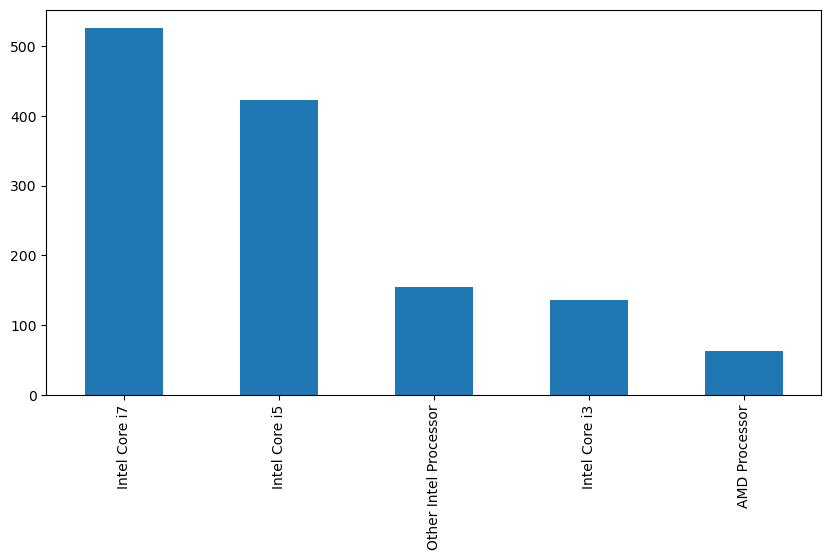

In [151]:
plt.figure(figsize=(10,5))
data['CPU'].value_counts().plot(kind='bar')

RAM column

<Axes: xlabel='RAM', ylabel='Price'>

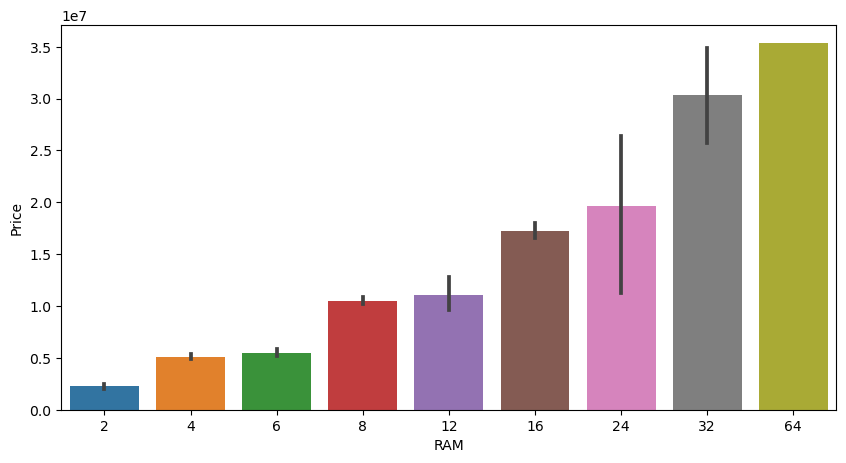

In [152]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['RAM'], y = data['Price'])

Storage column

In [153]:
data.rename(columns={" Storage": "Storage",
                     "Ips": "IPS",
                     "ppi": "PPI"}, inplace=True)

data

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7,128GB SSD,Intel HD Graphics 520,Windows,5673096.00,1.80,4,1,1,157.350512
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7,512GB SSD,Intel HD Graphics 520,Windows,13329108.00,1.30,16,1,1,276.053530
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,Other Intel Processor,64GB Flash Storage,Intel HD Graphics,Windows,2036268.00,1.50,2,0,0,111.935204
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7,1TB HDD,AMD Radeon R5 M330,Windows,6793488.00,2.19,6,0,0,100.454670


In [154]:
data['Storage'] = data['Storage'].astype(str).replace('\.0','',regex=True)
data['Storage'] = data['Storage'].astype(str).replace('GB','')
data['Storage'] = data['Storage'].astype(str).replace('TB','000')
new = data['Storage'].str.split('+',n=1,expand=True)


data['first_st'] = new[0].str.strip()
data['second_st'] = new[1]

data

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI,first_st,second_st
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,128GB SSD,None
1,Apple,Macbook Air,Ultrabook,Intel Core i5,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,128GB Flash Storage,None
2,HP,250 G6,Notebook,Intel Core i5,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,256GB SSD,None
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,512GB SSD,None
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,256GB SSD,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7,128GB SSD,Intel HD Graphics 520,Windows,5673096.00,1.80,4,1,1,157.350512,128GB SSD,None
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7,512GB SSD,Intel HD Graphics 520,Windows,13329108.00,1.30,16,1,1,276.053530,512GB SSD,None
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,Other Intel Processor,64GB Flash Storage,Intel HD Graphics,Windows,2036268.00,1.50,2,0,0,111.935204,64GB Flash Storage,None
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7,1TB HDD,AMD Radeon R5 M330,Windows,6793488.00,2.19,6,0,0,100.454670,1TB HDD,None


In [155]:
data['l1hdd'] = data['first_st'].apply(lambda x: 1 if "HDD" in x else 0)
data['l1ssd'] = data['first_st'].apply(lambda x: 1 if "SSD" in x else 0)
data['l1hybrid'] = data['first_st'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l1fs'] = data['first_st'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['first_st'] = data['first_st'].str.replace(r'\D','')
data

C:\Users\Vartan\AppData\Local\Temp\ipykernel_11020\2564902678.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first_st'] = data['first_st'].str.replace(r'\D','')


,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI,first_st,second_st,l1hdd,l1ssd,l1hybrid,l1fs
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,128,None,0,1,0,0
1,Apple,Macbook Air,Ultrabook,Intel Core i5,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,128,None,0,0,0,1
2,HP,250 G6,Notebook,Intel Core i5,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,256,None,0,1,0,0
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,512,None,0,1,0,0
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,256,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7,128GB SSD,Intel HD Graphics 520,Windows,5673096.00,1.80,4,1,1,157.350512,128,None,0,1,0,0
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7,512GB SSD,Intel HD Graphics 520,Windows,13329108.00,1.30,16,1,1,276.053530,512,None,0,1,0,0
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,Other Intel Processor,64GB Flash Storage,Intel HD Graphics,Windows,2036268.00,1.50,2,0,0,111.935204,64,None,0,0,0,1
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7,1TB HDD,AMD Radeon R5 M330,Windows,6793488.00,2.19,6,0,0,100.454670,1,None,1,0,0,0


In [156]:
data['second_st'].fillna('0',inplace=True)
data['l2hdd'] = data['second_st'].apply(lambda x: 1 if "HDD" in x else 0)
data['l2ssd'] = data['second_st'].apply(lambda x: 1 if "SSD" in x else 0)
data['l2hybrid'] = data['second_st'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l2fs'] = data['second_st'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['second_st'] = data['second_st'].str.replace(r'\D','')
data

C:\Users\Vartan\AppData\Local\Temp\ipykernel_11020\40313370.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second_st'] = data['second_st'].str.replace(r'\D','')


,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,...,first_st,second_st,l1hdd,l1ssd,l1hybrid,l1fs,l2hdd,l2ssd,l2hybrid,l2fs
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,Intel Core i5,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,...,128,0,0,0,0,1,0,0,0,0
2,HP,250 G6,Notebook,Intel Core i5,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,...,256,0,0,1,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,...,512,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7,128GB SSD,Intel HD Graphics 520,Windows,5673096.00,1.80,4,...,128,0,0,1,0,0,0,0,0,0
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7,512GB SSD,Intel HD Graphics 520,Windows,13329108.00,1.30,16,...,512,0,0,1,0,0,0,0,0,0
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,Other Intel Processor,64GB Flash Storage,Intel HD Graphics,Windows,2036268.00,1.50,2,...,64,0,0,0,0,1,0,0,0,0
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7,1TB HDD,AMD Radeon R5 M330,Windows,6793488.00,2.19,6,...,1,0,1,0,0,0,0,0,0,0


In [157]:
data['first_st'] = data['first_st'].astype('int')
data['second_st'] = data['second_st'].astype('int')

data['HDD'] = data['first_st']*data['l1hdd'] + data['second_st']*data['l2hdd']
data['SSD'] = data['first_st']*data['l1ssd'] + data['second_st']*data['l2ssd']
data['Hybrid'] = data['first_st']*data['l1hybrid'] + data['second_st']*data['l2hybrid']
data['FS'] = data['first_st']*data['l1fs'] + data['second_st']*data['l2fs']

data.drop(columns=['first_st','second_st','l1hdd','l1ssd','l1hybrid','l1fs','l2hdd','l2ssd','l2fs','l2hybrid'],inplace=True)
data

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI,HDD,SSD,Hybrid,FS
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,0,128,0,0
1,Apple,Macbook Air,Ultrabook,Intel Core i5,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,0,0,0,128
2,HP,250 G6,Notebook,Intel Core i5,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7,128GB SSD,Intel HD Graphics 520,Windows,5673096.00,1.80,4,1,1,157.350512,0,128,0,0
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7,512GB SSD,Intel HD Graphics 520,Windows,13329108.00,1.30,16,1,1,276.053530,0,512,0,0
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,Other Intel Processor,64GB Flash Storage,Intel HD Graphics,Windows,2036268.00,1.50,2,0,0,111.935204,0,0,0,64
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7,1TB HDD,AMD Radeon R5 M330,Windows,6793488.00,2.19,6,0,0,100.454670,1,0,0,0


In [158]:
data.drop(columns=['Storage'],inplace=True)

In [159]:
data.sample(10)

,Manufacturer,Model Name,Category,CPU,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI,HDD,SSD,Hybrid,FS
813,Dell,Vostro 5568,Notebook,Intel Core i7,Nvidia GeForce GT 940MX,Windows,8545212.00,1.98,8,0,0,141.211998,1,0,0,0
1034,HP,EliteBook 820,Ultrabook,Intel Core i7,Intel HD Graphics 520,Windows,11995308.00,1.26,8,0,0,176.232574,0,256,0,0
112,Lenovo,ThinkPad Yoga,2 in 1 Convertible,Intel Core i5,Intel HD Graphics 620,Windows,12439908.00,1.37,8,1,1,165.632118,0,256,0,0
1218,Acer,SP714-51 (i7-7Y75/8GB/256GB/FHD/W10),2 in 1 Convertible,Intel Core i7,Intel HD Graphics 615,Windows,10216908.00,1.20,8,1,1,157.350512,0,256,0,0
151,Dell,Inspiron 7567,Gaming,Intel Core i7,Nvidia GeForce GTX 1050,Windows,7993908.00,2.62,8,0,0,141.211998,0,0,1,0
1023,Dell,Latitude E5570,Notebook,Intel Core i5,Intel HD Graphics 520,Windows,9304944.48,2.09,8,0,0,141.211998,500,0,0,0
737,Dell,Inspiron 5379,2 in 1 Convertible,Intel Core i5,Intel UHD Graphics 620,Windows,5859828.00,1.55,8,1,0,165.632118,1,0,0,0
774,HP,EliteBook 820,Ultrabook,Intel Core i5,Intel HD Graphics 520,Windows,11061648.00,1.26,4,0,0,125.367428,0,256,0,0
453,Lenovo,ThinkPad T470,Notebook,Intel Core i5,Intel HD Graphics 620,Windows,11959740.00,1.65,8,0,0,157.350512,0,256,0,0
522,Dell,Latitude 5480,Notebook,Intel Core i5,Intel HD Graphics 620,Windows,11379359.16,1.64,8,0,0,157.350512,0,256,0,0


In [160]:
data['HDD'] = data['HDD'].apply(lambda x: x*1000 if x==1 or x==2 else x)
data.sample(10)

,Manufacturer,Model Name,Category,CPU,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI,HDD,SSD,Hybrid,FS
357,Dell,Inspiron 7577,Gaming,Intel Core i5,Nvidia GeForce GTX 1050,Windows,8883108.00,2.65,8,0,0,141.211998,1000,0,0,0
248,HP,ProBook 430,Notebook,Intel Core i5,Intel UHD Graphics 620,Windows,6002100.00,1.49,4,0,1,165.632118,500,0,0,0
51,Acer,Aspire A515-51G,Notebook,Intel Core i7,Nvidia GeForce MX150,Windows,7478172.00,2.20,8,0,1,141.211998,0,256,0,0
932,HP,250 G6,Notebook,Other Intel Processor,Intel HD Graphics 400,No OS,2568898.80,1.86,4,0,0,100.454670,1000,0,0,0
1059,HP,ProBook 450,Notebook,Intel Core i7,Intel HD Graphics 620,Windows,9514440.00,2.04,8,0,0,141.211998,0,256,0,0
118,Asus,X705UV-BX074T (i3-6006U/4GB/1TB/GeForce,Notebook,Intel Core i3,Nvidia GeForce 920MX,Windows,5015088.00,2.00,4,0,0,127.335675,1000,0,0,0
845,Dell,Vostro 3568,Notebook,Intel Core i7,AMD Radeon R5 M420,Windows,6571188.00,2.18,4,0,0,141.211998,0,256,0,0
1154,HP,15-bw002nv (A6-9220/4GB/256GB/Radeon,Notebook,AMD Processor,AMD Radeon 520,Windows,4258289.88,1.91,4,0,0,141.211998,0,256,0,0
495,Lenovo,Thinkpad X260,Ultrabook,Intel Core i5,Intel HD Graphics 520,Windows,9772308.00,1.30,8,0,1,125.367428,0,1,0,0
913,HP,ProBook 450,Notebook,Intel Core i7,Nvidia GeForce 930MX,Windows,9060859.08,2.04,8,0,0,141.211998,0,256,0,0


In [161]:
data.corr()['Price']

C:\Users\Vartan\AppData\Local\Temp\ipykernel_11020\2386607962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Price          1.000000
Weight         0.210166
RAM            0.742802
TouchScreen    0.189931
IPS            0.252799
PPI            0.473125
HDD           -0.099121
SSD            0.545948
Hybrid        -0.004750
FS            -0.040414
Name: Price, dtype: float64

In [162]:
data.drop(columns={'Hybrid','FS'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   CPU               1302 non-null   object 
 4   GPU               1302 non-null   object 
 5   Operating System  1302 non-null   object 
 6   Price             1302 non-null   float64
 7   Weight            1302 non-null   float64
 8   RAM               1302 non-null   int64  
 9   TouchScreen       1302 non-null   int64  
 10  IPS               1302 non-null   int64  
 11  PPI               1302 non-null   float64
 12  HDD               1302 non-null   int64  
 13  SSD               1302 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 142.5+ KB


GPU column

In [163]:
data['GPU'] = data['GPU'].apply(lambda x:x.split()[0])
data['GPU'].value_counts()

Intel     722
Nvidia    399
AMD       180
ARM         1
Name: GPU, dtype: int64

<Axes: xlabel='GPU', ylabel='Price'>

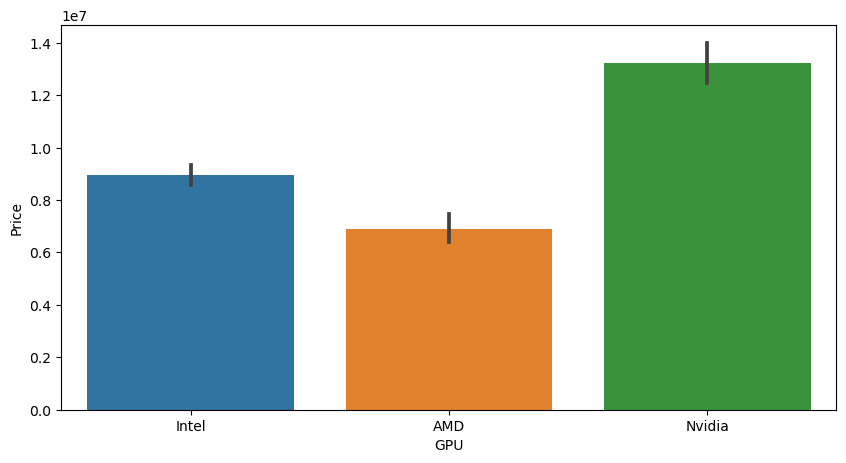

In [164]:
data = data[data['GPU'] != 'ARM']
plt.figure(figsize=(10,5))
sns.barplot(x = data['GPU'], y = data['Price'])

In [165]:
data

,Manufacturer,Model Name,Category,CPU,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,Intel,macOS,11912523.48,1.37,8,0,1,226.983005,0,128
1,Apple,Macbook Air,Ultrabook,Intel Core i5,Intel,macOS,7993374.48,1.34,8,0,0,127.677940,0,0
2,HP,250 G6,Notebook,Intel Core i5,Intel,No OS,5112900.00,1.86,8,0,0,141.211998,0,256
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,AMD,macOS,22563005.40,1.83,16,0,1,220.534624,0,512
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,Intel,macOS,16037611.20,1.37,8,0,1,226.983005,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7,Intel,Windows,5673096.00,1.80,4,1,1,157.350512,0,128
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7,Intel,Windows,13329108.00,1.30,16,1,1,276.053530,0,512
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,Other Intel Processor,Intel,Windows,2036268.00,1.50,2,0,0,111.935204,0,0
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7,AMD,Windows,6793488.00,2.19,6,0,0,100.454670,1000,0


Price in USD

In [166]:
data["Price"] = round(data["Price"] / 100 * 0.012, 2)

C:\Users\Vartan\AppData\Local\Temp\ipykernel_11020\938710312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price"] = round(data["Price"] / 100 * 0.012, 2)


In [167]:
data.head(10)

,Manufacturer,Model Name,Category,CPU,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,PPI,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,Intel,macOS,1429.50,1.37,8,0,1,226.983005,0,128
1,Apple,Macbook Air,Ultrabook,Intel Core i5,Intel,macOS,959.20,1.34,8,0,0,127.677940,0,0
2,HP,250 G6,Notebook,Intel Core i5,Intel,No OS,613.55,1.86,8,0,0,141.211998,0,256
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,AMD,macOS,2707.56,1.83,16,0,1,220.534624,0,512
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,Intel,macOS,1924.51,1.37,8,0,1,226.983005,0,256
5,Acer,Aspire 3,Notebook,AMD Processor,AMD,Windows,426.82,2.10,4,0,0,100.454670,500,0
6,Apple,MacBook Pro,Ultrabook,Intel Core i7,Intel,Mac OS,2283.43,2.04,16,0,1,220.534624,0,0
7,Apple,Macbook Air,Ultrabook,Intel Core i5,Intel,macOS,1236.38,1.34,8,0,0,127.677940,0,0
8,Asus,ZenBook UX430UN,Ultrabook,Intel Core i7,Nvidia,Windows,1595.22,1.30,16,0,0,157.350512,0,512
9,Acer,Swift 3,Ultrabook,Intel Core i5,Intel,Windows,821.62,1.60,8,0,1,157.350512,0,256


OS column

In [168]:
data["Operating System"].value_counts()

Windows      1124
No OS          66
Linux          62
Chrome OS      26
macOS          13
Mac OS          8
Android         2
Name: Operating System, dtype: int64

<Axes: xlabel='Operating System', ylabel='Price'>

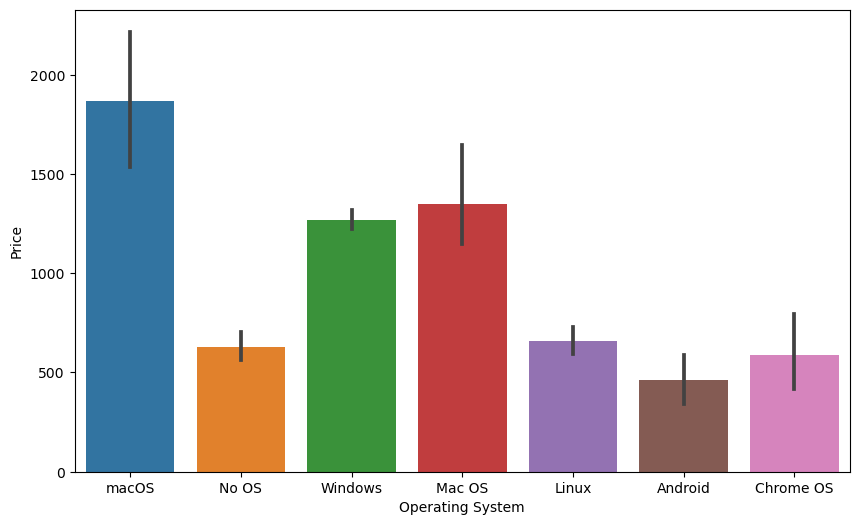

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(x = data['Operating System'], y = data['Price'])

In [170]:
def merge_os(os):
    if os == 'Windows':
        return os
    elif os == 'macOS' or os == 'Mac OS':
        return 'Mac'
    elif os == 'Linux':
        return os
    else:
        return 'Others/No OS'

In [171]:
data.loc[:, 'OS'] = data['Operating System'].apply(merge_os)
data.drop(columns=['Operating System'],inplace=True)
data.head()

C:\Users\Vartan\AppData\Local\Temp\ipykernel_11020\2978649220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'OS'] = data['Operating System'].apply(merge_os)
C:\Users\Vartan\AppData\Local\Temp\ipykernel_11020\2978649220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Operating System'],inplace=True)


,Manufacturer,Model Name,Category,CPU,GPU,Price,Weight,RAM,TouchScreen,IPS,PPI,HDD,SSD,OS
0,Apple,MacBook Pro,Ultrabook,Intel Core i5,Intel,1429.50,1.37,8,0,1,226.983005,0,128,Mac
1,Apple,Macbook Air,Ultrabook,Intel Core i5,Intel,959.20,1.34,8,0,0,127.677940,0,0,Mac
2,HP,250 G6,Notebook,Intel Core i5,Intel,613.55,1.86,8,0,0,141.211998,0,256,Others/No OS
3,Apple,MacBook Pro,Ultrabook,Intel Core i7,AMD,2707.56,1.83,16,0,1,220.534624,0,512,Mac
4,Apple,MacBook Pro,Ultrabook,Intel Core i5,Intel,1924.51,1.37,8,0,1,226.983005,0,256,Mac


Correlation matrix

In [172]:
correlation_matrix = data.corr()['Price']
print(correlation_matrix)

Price          1.000000
Weight         0.209664
RAM            0.742700
TouchScreen    0.191624
IPS            0.253911
PPI            0.475017
HDD           -0.099572
SSD            0.545736
Name: Price, dtype: float64


C:\Users\Vartan\AppData\Local\Temp\ipykernel_11020\4262344772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()['Price']


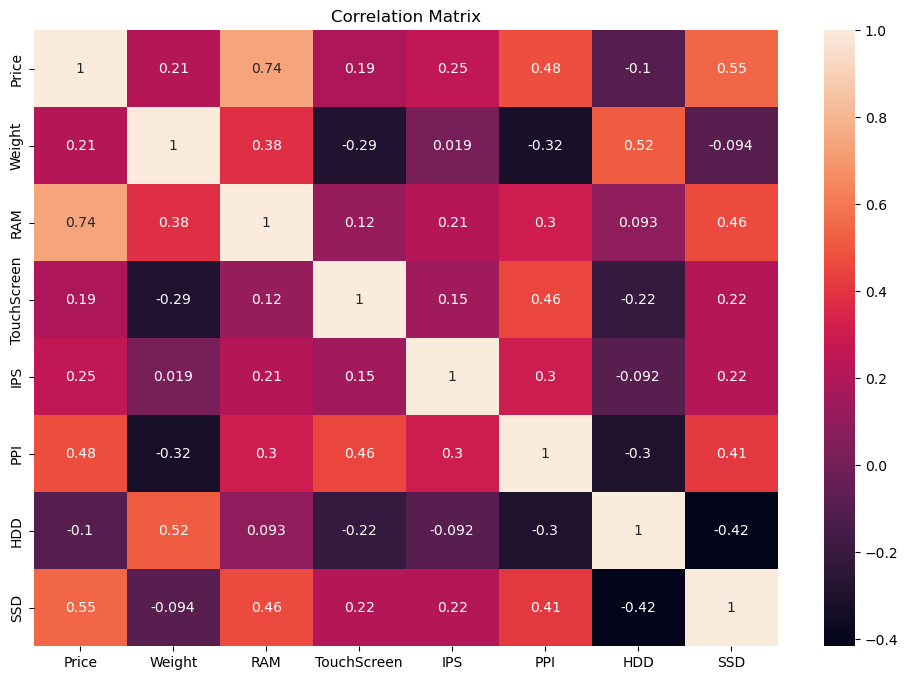

In [173]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

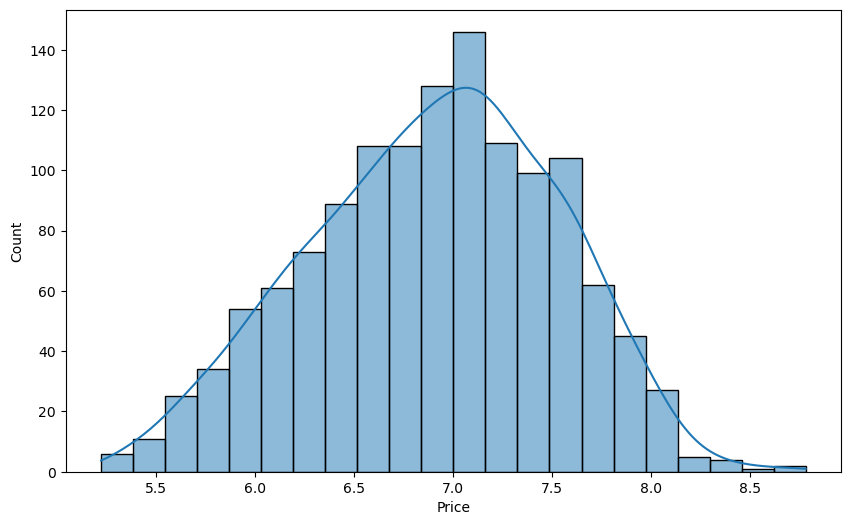

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['Price']), kde=True)

Prediction Models

In [175]:
data = data.drop(columns="Model Name")

In [176]:
data

,Manufacturer,Category,CPU,GPU,Price,Weight,RAM,TouchScreen,IPS,PPI,HDD,SSD,OS
0,Apple,Ultrabook,Intel Core i5,Intel,1429.50,1.37,8,0,1,226.983005,0,128,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,959.20,1.34,8,0,0,127.677940,0,0,Mac
2,HP,Notebook,Intel Core i5,Intel,613.55,1.86,8,0,0,141.211998,0,256,Others/No OS
3,Apple,Ultrabook,Intel Core i7,AMD,2707.56,1.83,16,0,1,220.534624,0,512,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,1924.51,1.37,8,0,1,226.983005,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,680.77,1.80,4,1,1,157.350512,0,128,Windows
1298,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,1599.49,1.30,16,1,1,276.053530,0,512,Windows
1299,Lenovo,Notebook,Other Intel Processor,Intel,244.35,1.50,2,0,0,111.935204,0,0,Windows
1300,HP,Notebook,Intel Core i7,AMD,815.22,2.19,6,0,0,100.454670,1000,0,Windows


In [230]:
transformed_data = pd.get_dummies(data, columns=['Manufacturer','Category', 'CPU', 'GPU', 'OS'])

In [217]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1301
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              1301 non-null   float64
 1   Weight                             1301 non-null   float64
 2   RAM                                1301 non-null   int64  
 3   TouchScreen                        1301 non-null   int64  
 4   IPS                                1301 non-null   int64  
 5   PPI                                1301 non-null   float64
 6   HDD                                1301 non-null   int64  
 7   SSD                                1301 non-null   int64  
 8   Manufacturer_Acer                  1301 non-null   uint8  
 9   Manufacturer_Apple                 1301 non-null   uint8  
 10  Manufacturer_Asus                  1301 non-null   uint8  
 11  Manufacturer_Dell                  1301 non-null   uint8

In [194]:
transformed_data.corr()['Price']

Price                                1.000000
Weight                               0.209664
RAM                                  0.742700
TouchScreen                          0.191624
IPS                                  0.253911
PPI                                  0.475017
HDD                                 -0.099572
SSD                                  0.545736
Manufacturer_Acer                   -0.208405
Manufacturer_Apple                   0.080761
Manufacturer_Asus                   -0.012605
Manufacturer_Dell                    0.048672
Manufacturer_HP                     -0.041202
Manufacturer_Lenovo                 -0.028903
Manufacturer_MSI                     0.180249
Manufacturer_Other (low price)      -0.126331
Manufacturer_Other (middle price)    0.074888
Manufacturer_Razer                   0.233898
Manufacturer_Toshiba                 0.040407
Category_2 in 1 Convertible          0.072536
Category_Gaming                      0.376142
Category_Netbook                  

In [231]:
from sklearn.model_selection import train_test_split

X = transformed_data.drop('Price', axis=1)
y = transformed_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
def show_feature_importance(importance, feature_names, top_n=15):
    sorted_indices = np.argsort(importance)[::-1]
    sorted_importance = importance[sorted_indices]
    nonzero_indices = np.nonzero(sorted_importance)
    sorted_importance = sorted_importance[nonzero_indices][:top_n]
    sorted_features = feature_names[sorted_indices][nonzero_indices][:top_n]

    plt.figure(figsize=(10, 8))
    plt.bar(range(len(sorted_features)), sorted_importance, tick_label=sorted_features)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.xticks(rotation=70)
    plt.show()

# Виклик функції для показу важливості ознак



Linear Regression

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Absolute Error:', mae)
print("R^2 Score:", r2)

Mean Absolute Error: 276.99262590144934
R^2 Score: 0.7416595818198279


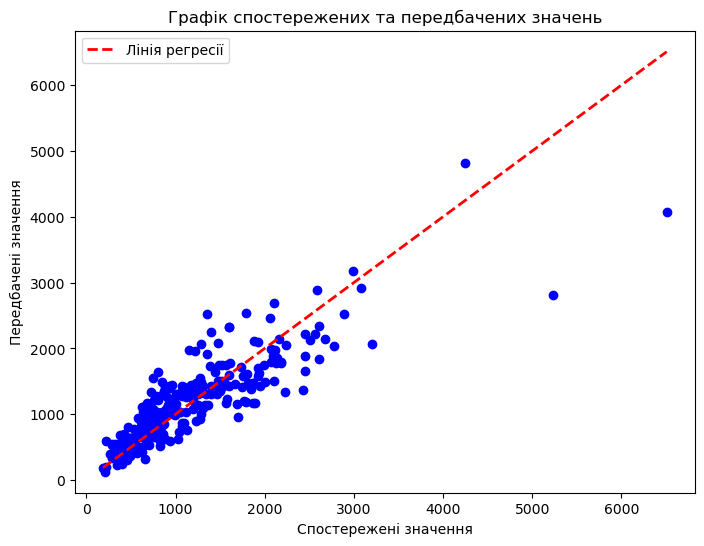

In [255]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Лінія регресії')
plt.xlabel('Спостережені значення')
plt.ylabel('Передбачені значення')
plt.title('Графік спостережених та передбачених значень')
plt.legend()
plt.show()

Decision Tree

In [246]:
from sklearn.tree import DecisionTreeRegressor


# Побудова та навчання моделі дерева рішень
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred_dtr = dtr.predict(X_test)

# Оцінка точності моделі
mae = mean_absolute_error(y_test, y_pred_dtr)
r2 = r2_score(y_test, y_pred_dtr)

print('Mean Absolute Error:', mae)
print("R^2 Score:", r2)

Mean Absolute Error: 239.37913154533848
R^2 Score: 0.6981294799707649


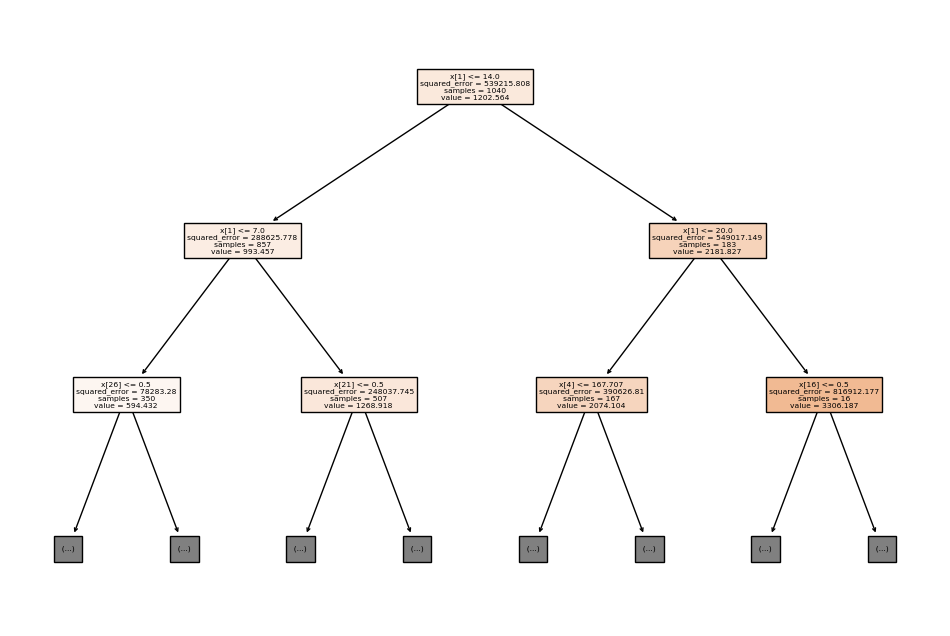

In [260]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(dtr, filled=True, max_depth=2)
plt.show()

Random Forest

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))

MAE: 207.67100215015498
R2 Score: 0.7994820852453618


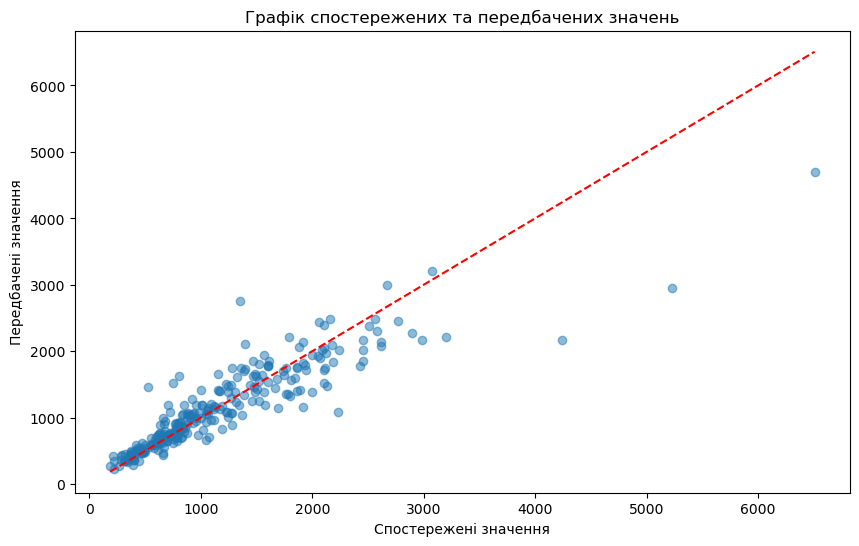

In [250]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Спостережені значення')
plt.ylabel('Передбачені значення')
plt.title('Графік спостережених та передбачених значень')
plt.show()

Порівняння результатів

In [251]:
# Лінійна регресія
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Дерево рішень
dtr_mae = mean_absolute_error(y_test, y_pred_dtr)
dtr_r2 = r2_score(y_test, y_pred_dtr)

# Випадковий ліс
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Виведення результатів
print("Лінійна регресія:")
print("MAE:", lr_mae)
print("R^2:", lr_r2)
print()

print("Дерево рішень:")
print("MAE:", dtr_mae)
print("R^2:", dtr_r2)
print()

print("Випадковий ліс:")
print("MAE:", rf_mae)
print("R^2:", rf_r2)

Лінійна регресія:
MAE: 276.99262590144934
R^2: 0.7416595818198279

Дерево рішень:
MAE: 239.37913154533848
R^2: 0.6981294799707649

Випадковий ліс:
MAE: 207.67100215015498
R^2: 0.7994820852453618
